In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/raw/train.csv')
df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [42]:
columns_of_interest = ['rot_x', 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5', 'tof_1_v10', 'tof_2_v10', 'tof_3_v10', 'tof_4_v10', 'tof_5_v10'] 

for val in columns_of_interest:
    count = df[val].isnull().sum()
    print(f"{val} - {count}")

rot_x - 3692
thm_1 - 6987
thm_2 - 7638
thm_3 - 6472
thm_4 - 6224
thm_5 - 33286
tof_1_v10 - 6224
tof_2_v10 - 6224
tof_3_v10 - 6224
tof_4_v10 - 6224
tof_5_v10 - 30142


In [46]:
missing_per_col = df.isnull().sum()
missing_per_col = missing_per_col[missing_per_col > 0].sort_values(ascending=False)

total_missing = missing_per_col.sum()
total_cells = np.prod(df.shape)
missing_perc = total_missing / total_cells * 100

print(f"Total Missing: {total_missing}, Missing Percentage: {missing_perc}")

missing_per_col

Total Missing: 3597807, Missing Percentage: 1.835089211261799


thm_5        33286
tof_5_v43    30142
tof_5_v42    30142
tof_5_v3     30142
tof_5_v41    30142
             ...  
tof_2_v58     6224
rot_z         3692
rot_y         3692
rot_x         3692
rot_w         3692
Length: 329, dtype: int64

In [48]:
missing_df = df.isnull()
missing_df = missing_df[missing_df.columns[missing_df.any()]]

missing_corr = missing_df.corr()

<Axes: >

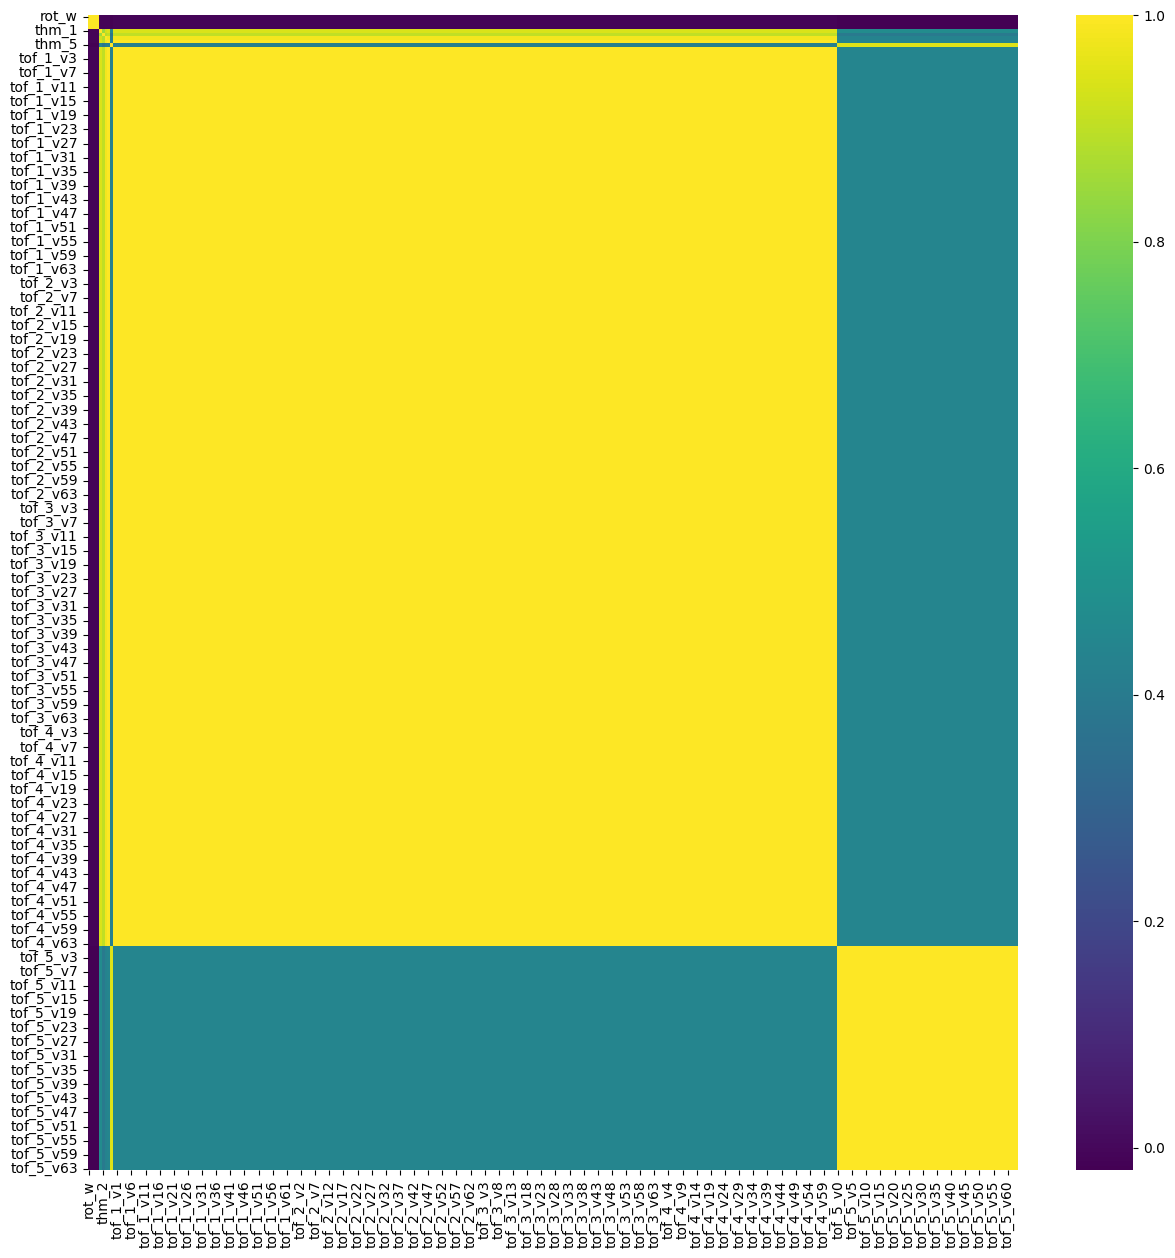

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(missing_corr, cmap='viridis')

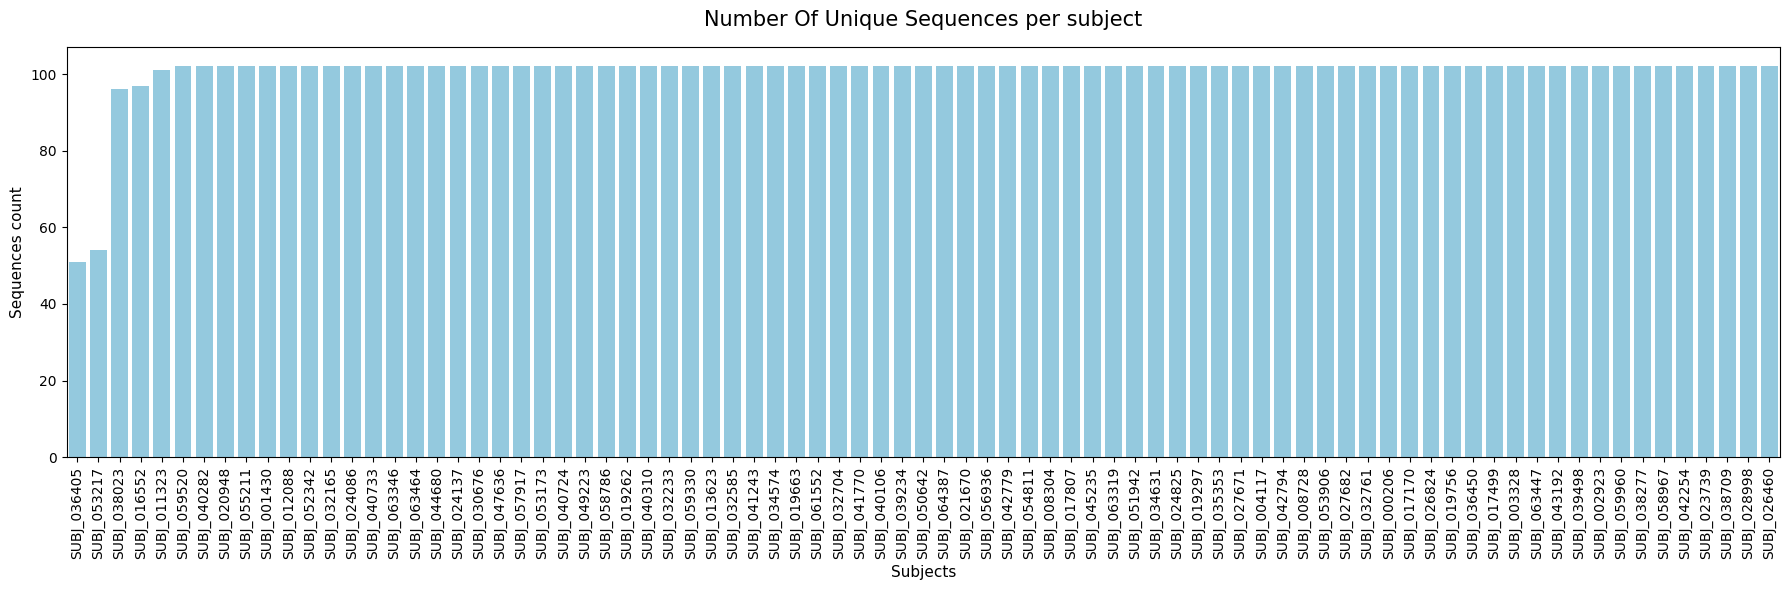

In [84]:
unique_seq_df = df.drop_duplicates(subset=['sequence_id'])
subject_seq_counts = unique_seq_df.subject.value_counts().sort_values()

plt.figure(figsize=(18, 6))
sns.barplot(x=subject_seq_counts.index, y=subject_seq_counts.values, color='skyblue')
plt.title("Number Of Unique Sequences per subject", fontsize=15, pad=15)
plt.ylabel("Sequences count", fontsize=11)
plt.xlabel("Subjects", fontsize=11)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()